In [1]:
from collections import namedtuple
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
record = namedtuple('record', ['team', 'score'])
C = 50

outcome = namedtuple('outcome', ['team1', 'team2', 'score'])

class ELORating(object):
    
    def __init__(self, team_name, base_rating=800):
        self.team_name = team_name
        self.rating = base_rating
        
    def get_new_rating(self, team, win):
#         print(self.team_name)
#         print(team.team_name)
#         print(win)
#         print(self.rating)
        expected = expected_outcome(self, team)
#         print(expected)
#         print(win - expected)
#         print(C * (win - expected))
        new_rating = self.rating + C * (win - expected)
#         print(new_rating)
#         print()
        return new_rating
        #self.rating = new_rating

In [62]:

def get_team_ratings(teams, outcomes):
    team_ratings = {team:ELORating(team) for team in teams}
    ratings_data = {team:[800] for team in teams}

    return update_team_ratings(team_ratings, outcomes, ratings_data)
    




In [61]:
def update_team_ratings(team_ratings, outcomes, old_ratings_data=None):
    ratings_data = old_ratings_data if old_ratings_data is not None else defaultdict(list)
    
    for o in outcomes:

        team1 = team_ratings[o.team1]
        team2 = team_ratings[o.team2]

        team1_new_rating = team1.get_new_rating(team2, o.score)
        team2_new_rating = team2.get_new_rating(team1, -o.score)

        ratings_data[team1.team_name].append(team1_new_rating)
        ratings_data[team2.team_name].append(team2_new_rating)

        team1.rating = max(100, team1_new_rating)
        team2.rating = max(100, team2_new_rating)
    return team_ratings, ratings_data

In [3]:
def expected_outcome(t1, t2):
    return 1/(1 + 10**((t2.rating - t1.rating)/400))

In [25]:
def print_ordered_ratings(ratings):
    ratings = standings = {k: v for k, v in sorted(ratings.items(), key=lambda item: item[1].rating)}
    for team, rating in ratings.items():
        print(team, rating.rating)

In [26]:
def plot_team_ratings(ratings_data):
    plt.figure(figsize=(16, 10))
    for team, data in ratings_data.items():
        plt.plot(data, label=team, linewidth=5)
    plt.legend()


In [31]:
def get_expectations(ratings, schedule):
    for t1, t2 in schedule:
        t1 = ratings[t1]
        t2 = ratings[t2]
        print(t1.team_name, t2.team_name, expected_outcome(t1, t2))

In [5]:
c9 = "cloud9"
fly = "FlyQuest"
tsm = "TSM"
imt = "Immortals"
tl = "Team Liquid"
eg = "Evil Geniuses"
dig = "Dignitas"
gg = "Golden Guardians"
hundred = "100 Thieves"
clg = "Counter Logic Gaming"

teams = [
    c9,
    fly,
    tsm,
    imt,
    tl,
    eg,
    dig,
    gg,
    hundred,
    clg
]



outcomes = [
    outcome(c9, tl, 1),
    outcome(clg, dig, -1),
    outcome(hundred, gg, 1),
    outcome(imt, fly, -1),
    outcome(dig, eg, 1),
    outcome(tsm, imt, -1),
    outcome(gg, c9, -1),
    outcome(fly, clg, 1),
    outcome(eg, hundred, 1),
    outcome(tl, tsm, 1),
    outcome(clg, hundred, -1),
    outcome(dig, tl, 1),
    outcome(c9, imt, 1),
    outcome(eg, gg, -1),
    outcome(tl, fly, 1),
    outcome(eg, tsm, -1),
    outcome(hundred, c9, -1),
    outcome(imt, gg, 1),
    outcome(fly, dig, 1),
    outcome(tsm, clg, 1),
    outcome(eg, clg, -1),
    outcome(hundred, tl, 1),
    outcome(tsm, dig, 1),
    outcome(c9, fly, 1),
    outcome(imt, hundred, 1),
    outcome(gg, tsm, -1),
    outcome(dig, c9, -1),
    outcome(fly, eg, -1),
    outcome(tl, gg, -1),
    outcome(clg, imt, -1),
    outcome(tl, imt, -1),
    outcome(c9, tsm, 1),
    outcome(clg, gg, -1),
    outcome(hundred, dig, -1),
    outcome(dig, gg, -1),
    outcome(clg, tl, -1), 
    outcome(tsm, fly, -1),
    outcome(eg, imt, 1),
    outcome(fly, hundred, 1),
    outcome(eg, c9, -1),
    outcome(hundred, tsm, -1), 
    outcome(c9, clg, 1),
    outcome(dig, imt, 1),
    outcome(fly, gg, 1),
    outcome(eg, tl, 1),
    outcome(imt, c9, -1), 
    outcome(gg, hundred, -1),
    outcome(fly, clg, 1),
    outcome(tl, dig, 1),
    outcome(tsm, eg, 1),
    outcome(c9, fly, 1),
    outcome(tl, tsm, 1),
    outcome(gg, imt, 1),
    outcome(hundred, eg, 1),
    outcome(tl, hundred, 1),
    outcome(dig, fly, -1),
    outcome(clg, tsm, 1),
    outcome(eg, gg, 1),
    outcome(imt, clg, 1),
    outcome(c9, dig, 1)
]

In [23]:
lcs_ratings, lcs_data = get_team_ratings(team_ratings, outcomes)

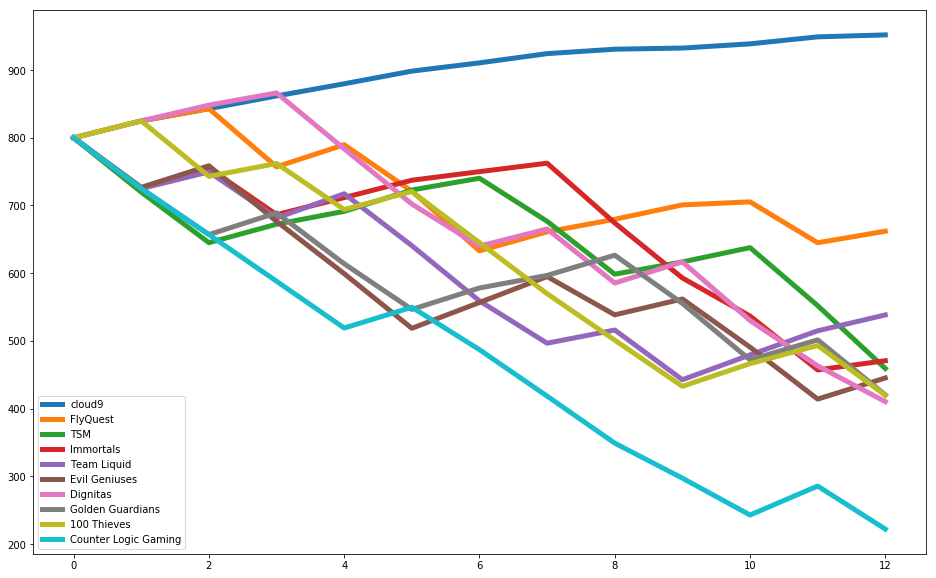

In [27]:
plot_team_ratings(lcs_data)

In [28]:
print_ordered_ratings(lcs_ratings)

Counter Logic Gaming 222.02655926405157
Dignitas 410.2599131043127
100 Thieves 419.7318516502885
Golden Guardians 420.37426526038615
Evil Geniuses 445.21432048344377
TSM 459.31447668771676
Immortals 470.7215277127768
Team Liquid 538.3554129680025
FlyQuest 662.0233316809832
cloud9 951.9783411880381


In [29]:
schedule = [
    (tsm, c9),
    (dig, hundred),
    (tl, clg),
    (eg, fly),
    (hundred, imt),
    (fly, tsm),
    (gg, dig),
    (clg, eg),
    (imt, tl),
    (c9, gg)
]

In [32]:
get_expectations(lcs_ratings, schedule)

TSM cloud9 0.055409461552073984
Dignitas 100 Thieves 0.48637216077394885
Team Liquid Counter Logic Gaming 0.8606783126870329
Evil Geniuses FlyQuest 0.2230373570120653
100 Thieves Immortals 0.42714229041725005
FlyQuest TSM 0.7625816788756973
Golden Guardians Dignitas 0.5145516123292848
Counter Logic Gaming Evil Geniuses 0.2167390134645167
Immortals Team Liquid 0.40387813290497515
cloud9 Golden Guardians 0.9552191009620521


In [ ]:
lcs_new_outcomes = [
    
]

In [63]:
vit = "Team Vitality"
rogue = "Rogue"
schalke = "Schalke 04"
mad = "MAD Lions"
sk = "SK gaming"
fnc = "Fnatic"
excel = "Excel Esports"
misfits = "Misfits Gaming"
origen = "Origen"
g2 = "G2 Esports"

lec_teams = [
    vit,
rogue,
schalke,
mad,
sk, fnc, excel, misfits, origen, g2]



lec_outcomes = [
    outcome(g2, mad, 1),
    outcome(sk, vit, 1),
    outcome(rogue, misfits, 1),
    outcome(excel, schalke, 1),
    outcome(fnc, origen, -1),
    outcome(vit, mad, -1),
    outcome(excel, rogue, -1),
    outcome(origen, schalke, 1),
    outcome(fnc, misfits, 1),
    outcome(sk, g2, -1),
    outcome(origen, rogue, 1),
    outcome(sk, misfits, -1),
    outcome(vit, g2, -1),
    outcome(excel, mad, 1),
    outcome(schalke, fnc, -1),
    outcome(excel, misfits, -1),
    outcome(schalke, mad, -1),
    outcome(rogue, vit, 1),
    outcome(sk, fnc, -1),
    outcome(g2, origen, 1),
    outcome(mad, sk, 1),
    outcome(schalke, misfits, -1),
    outcome(fnc, excel, 1),
    outcome(vit, origen, -1),
    outcome(rogue, g2, -1),
    outcome(schalke, sk, -1),
    outcome(excel, vit, 1),
    outcome(rogue, mad, -1),
    outcome(misfits, origen, 1),
    outcome(g2, fnc, 1),
    outcome(origen, mad, 1),
    outcome(excel, sk, 1),
    outcome(vit, fnc, -1),
    outcome(schalke, rogue, -1),
    outcome(g2, misfits, -1),
    outcome(vit, misfits, -1),
    outcome(rogue, sk, 1),
    outcome(g2, schalke, -1),
    outcome(origen, excel, 1),
    outcome(fnc, mad, -1),
    outcome(mad, misfits, -1),
    outcome(vit, schalke, -1),
    outcome(g2, excel, 1),
    outcome(origen, sk, 1),
    outcome(rogue, fnc, -1),
    outcome(vit, sk, 1),
    outcome(excel, schalke, 1),
    outcome(rogue, misfits, 1),
    outcome(mad, g2, 1),
    outcome(origen, fnc, -1),
    outcome(rogue, excel, 1),
    outcome(vit, mad, -1),
    outcome(misfits, fnc, -1),
    outcome(schalke, origen, -1),
    outcome(g2, sk, 1),
    outcome(sk, misfits, -1),
    outcome(mad, excel, -1),
    outcome(fnc, schalke, 1),
    outcome(rogue, origen, -1), 
    outcome(g2, vit, 1)
    
]

In [64]:
lec_ratings, lec_rating_graphing_data = get_team_ratings(lec_teams, lec_outcomes)

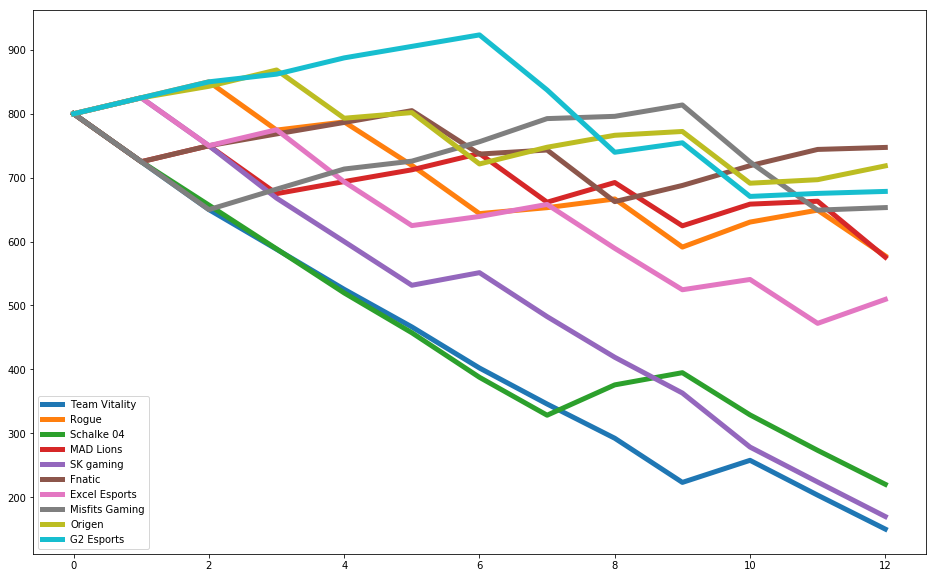

In [65]:
plot_team_ratings(lec_rating_graphing_data)

In [66]:
schedule = [
   (vit, rogue),
    (schalke, mad),
    (sk, fnc),
    (excel, misfits),
    (origen, g2),
    (sk, schalke),
    (vit, excel),
    (rogue, mad),
    (misfits, origen),
    (fnc, g2)
]

In [67]:
get_expectations(lec_ratings, schedule)

Team Vitality Rogue 0.07862190566385419
Schalke 04 MAD Lions 0.11443135958697327
SK gaming Fnatic 0.03472330224542557
Excel Esports Misfits Gaming 0.3042941080304754
Origen G2 Esports 0.5572726834330887
SK gaming Schalke 04 0.4279515513700548
Team Vitality Excel Esports 0.11211225997304819
Rogue MAD Lions 0.50289095813879
Misfits Gaming Origen 0.4071565603222901
Fnatic G2 Esports 0.5977941843404473


In [68]:
new_outcomes = [
    outcome(vit, rogue, -1),
    outcome(schalke, mad, -1),
    outcome(sk, fnc, -1),
    outcome(excel, misfits, -1),
    outcome(origen, g2, -1),
    outcome(sk, schalke, -1),
    outcome(excel, vit, 1),
    outcome(rogue, mad, 1),
    outcome(origen, misfits, 1),
    outcome(fnc, g2, -1)
]

In [69]:
new_ratings, new_data = update_team_ratings(lec_ratings, new_outcomes, lec_rating_graphing_data)

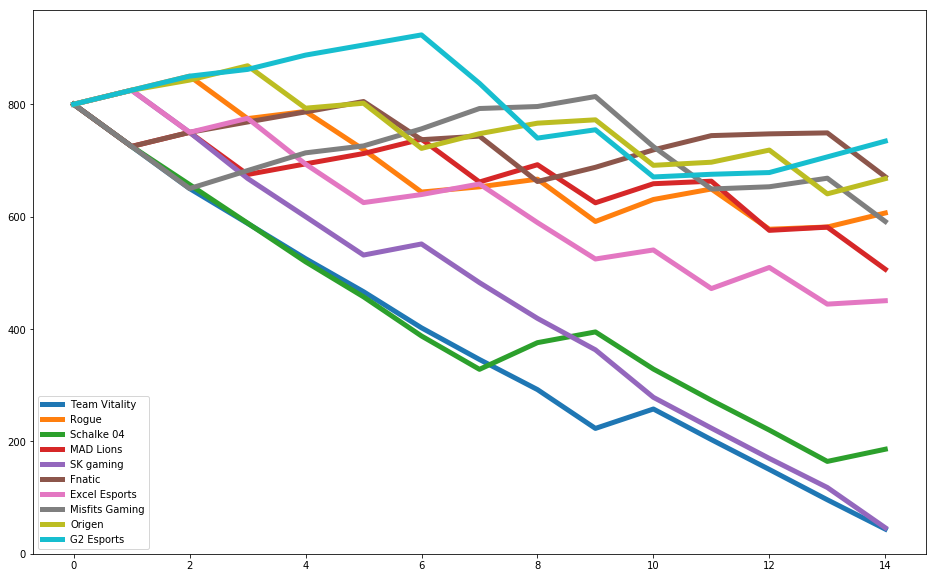

In [70]:
plot_team_ratings(new_data)

In [71]:
print_ordered_ratings(new_ratings)

Team Vitality 100
SK gaming 100
Schalke 04 186.07736284624482
Excel Esports 450.36463394865166
MAD Lions 506.3282334646662
Misfits Gaming 591.3950250602984
Rogue 606.5151973242625
Origen 667.5813311106756
Fnatic 670.9951672051361
G2 Esports 734.3975366513822
